In [1]:
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import ast 
from collections import Counter
#from wordcloud import WordCloud
#import cufflinks as cf
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

In [2]:
old_df = pd.read_csv('application_data.csv')

In [3]:
df=old_df[['TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','DAYS_EMPLOYED','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','NAME_INCOME_TYPE','REGION_POPULATION_RELATIVE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_CREDIT']].copy()
df

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_EMPLOYED,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_CREDIT
0,1,M,N,Y,-637,Business Entity Type 3,Cash loans,Laborers,1.0,Working,0.018801,House / apartment,Single / not married,Secondary / secondary special,0,202500.0,351000.0,406597.5
1,0,F,N,N,-1188,School,Cash loans,Core staff,2.0,State servant,0.003541,House / apartment,Married,Higher education,0,270000.0,1129500.0,1293502.5
2,0,M,Y,Y,-225,Government,Revolving loans,Laborers,1.0,Working,0.010032,House / apartment,Single / not married,Secondary / secondary special,0,67500.0,135000.0,135000.0
3,0,F,N,Y,-3039,Business Entity Type 3,Cash loans,Laborers,2.0,Working,0.008019,House / apartment,Civil marriage,Secondary / secondary special,0,135000.0,297000.0,312682.5
4,0,M,N,Y,-3038,Religion,Cash loans,Core staff,1.0,Working,0.028663,House / apartment,Single / not married,Secondary / secondary special,0,121500.0,513000.0,513000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,M,N,N,-236,Services,Cash loans,Sales staff,1.0,Working,0.032561,With parents,Separated,Secondary / secondary special,0,157500.0,225000.0,254700.0
307507,0,F,N,Y,365243,XNA,Cash loans,NaN,1.0,Pensioner,0.025164,House / apartment,Widow,Secondary / secondary special,0,72000.0,225000.0,269550.0
307508,0,F,N,Y,-7921,School,Cash loans,Managers,1.0,Working,0.005002,House / apartment,Separated,Higher education,0,153000.0,585000.0,677664.0
307509,1,F,N,Y,-4786,Business Entity Type 1,Cash loans,Laborers,2.0,Commercial associate,0.005313,House / apartment,Married,Secondary / secondary special,0,171000.0,319500.0,370107.0


In [4]:
df.dropna(inplace=True)
df

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,DAYS_EMPLOYED,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_CREDIT
0,1,M,N,Y,-637,Business Entity Type 3,Cash loans,Laborers,1.0,Working,0.018801,House / apartment,Single / not married,Secondary / secondary special,0,202500.0,351000.0,406597.5
1,0,F,N,N,-1188,School,Cash loans,Core staff,2.0,State servant,0.003541,House / apartment,Married,Higher education,0,270000.0,1129500.0,1293502.5
2,0,M,Y,Y,-225,Government,Revolving loans,Laborers,1.0,Working,0.010032,House / apartment,Single / not married,Secondary / secondary special,0,67500.0,135000.0,135000.0
3,0,F,N,Y,-3039,Business Entity Type 3,Cash loans,Laborers,2.0,Working,0.008019,House / apartment,Civil marriage,Secondary / secondary special,0,135000.0,297000.0,312682.5
4,0,M,N,Y,-3038,Religion,Cash loans,Core staff,1.0,Working,0.028663,House / apartment,Single / not married,Secondary / secondary special,0,121500.0,513000.0,513000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,0,F,N,Y,-7258,Self-employed,Cash loans,Sales staff,1.0,Working,0.022625,House / apartment,Separated,Secondary / secondary special,0,153000.0,225000.0,331920.0
307506,0,M,N,N,-236,Services,Cash loans,Sales staff,1.0,Working,0.032561,With parents,Separated,Secondary / secondary special,0,157500.0,225000.0,254700.0
307508,0,F,N,Y,-7921,School,Cash loans,Managers,1.0,Working,0.005002,House / apartment,Separated,Higher education,0,153000.0,585000.0,677664.0
307509,1,F,N,Y,-4786,Business Entity Type 1,Cash loans,Laborers,2.0,Commercial associate,0.005313,House / apartment,Married,Secondary / secondary special,0,171000.0,319500.0,370107.0


## Split data 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,plot_confusion_matrix, accuracy_score,confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['NAME_HOUSING_TYPE'])
 
# printing label
label

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
y = df['TARGET']
df.drop('TARGET',axis=1, inplace=True)

all_cat_columns = df.select_dtypes(['object']).columns
df[all_cat_columns] = df[all_cat_columns].apply(lambda x: pd.factorize(x)[0])

X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## create model : logistic regression 

In [7]:
lm1 = LogisticRegression().fit(X_train,y_train)

pred1 = lm1.predict(X_test)

Real_Values1 = np.array(y_test)
print("Logistic Regression Model")
print(Real_Values1)
print(pred1)
print("\nconfusion_matrix:\n")
print(confusion_matrix(y_test,pred1))
print("\nmodel's accuracy:\n") 
lm1.score(X_test, y_test) 
print("Standard errors: ", np.sqrt(np.diag(lm1)))
confusion_matrix = confusion_matrix(y_test,pred1)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display1.plot()
plt.show()

Logistic Regression Model
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]

confusion_matrix:

[[57632     0]
 [ 5638     0]]

model's accuracy:



ValueError: Input must be 1- or 2-d.

In [8]:
lm1.coef_

array([[-9.11301129e-08, -2.57204178e-08, -2.59260867e-08,
         3.12971959e-04, -1.00376358e-06, -2.80865799e-08,
        -3.99515203e-07, -2.07057430e-07, -4.85581917e-08,
        -1.79442125e-09, -2.23912619e-08, -1.17479702e-07,
        -3.28497093e-08, -4.93303712e-08, -5.86138200e-06,
        -3.98321871e-06,  2.38494182e-06]])

In [9]:
lm1.intercept_

array([-9.05115078e-08])

In [10]:
print("Training set score: {:.3f}".format(lm1.score(X_train,y_train)))
print("Test set score: {:.3f}".format(lm1.score(X_train,y_train)))

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Training set score: 0.913
Test set score: 0.913
         Current function value: 0.289030
         Iterations: 35


C:\Users\Arwa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               210899
Model:                          Logit   Df Residuals:                   210882
Method:                           MLE   Df Model:                           16
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                 0.02868
Time:                        00:42:03   Log-Likelihood:                -60956.
converged:                      False   LL-Null:                       -62756.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
CODE_GENDER                   -0.4757      0.016    -29.057      0.000      -0.508      -0.444
FLAG_OWN_CAR                  -0.3957      0.018    -22.416      0.000      -0.430 

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='TARGET'>

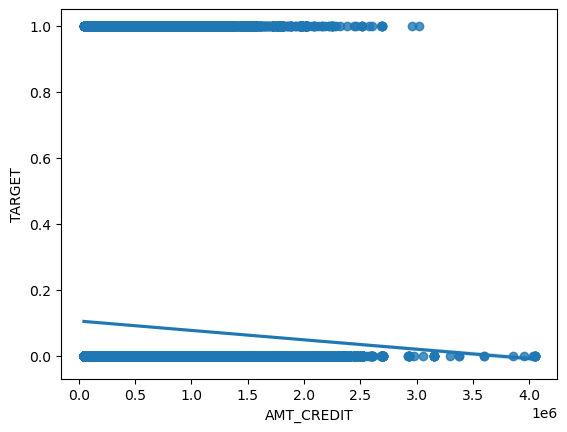

In [17]:
sns.regplot(x=df['AMT_CREDIT'],y=y)